## Yesterday was intense

- We webscraped the population of Italian MPs.
    - The rough-API method
- Presented some summary statistics:
    - Age
    - Gender
    - Regional representation

## Today let's be less intense

- Finish summary statistics:
    - Education level
- Look at other way to webscrape.
    - Full-API
    - Full-API with cookie stealing
    - Selenium

## Do you remember how to access your data?

- Either you go to your folder, right click your data file and copy the path
- Either you locate python on the folder, and import specifying only the name

In [2]:
import pandas as pd
"C:\\Users\\anato\\Documents\\travail\\courses\\python-for-economist\\class5\\italian_mps.csv"
"C:/Users/anato/Documents/travail/courses/python-for-economist/class5/italian_mps.csv"
# Import the dataset
dataset = pd.read_csv('C:/Users/anato/Documents/travail/courses/python-for-economist/class5/italian_mps.csv')

# Present some random rows with specific columns
dataset[['name', 'party', 'birthdate', 'birthplace', 'education']].sample(n=5)

,name,party,birthdate,birthplace,education
52,BRAGA Chiara,PD-IDP,1979-09-02,COMO,"Laurea in pianificazione territoriale, urbanis..."
99,COLOMBO Beatriz,FDI,1978-03-13,RIMINI (FORLI'),Laurea in psicologia
181,GIGLIO VIGNA Alessandro,LEGA,1980-12-13,IVREA (TORINO),Diploma di istituto tecnico commerciale
281,PADOVANI Marco,FDI,1959-03-25,VERONA,Diploma di maturità d'arte applicata
71,CARE' Nicola,PD-IDP,1960-07-31,GUARDAVALLE (CATANZARO),Imprenditore


### Education level

Let's have a closer look at the column we created

In [9]:
print(dataset[['name', 'education']].sample(n = 5))

                            name  \
39                  BILLI Simone   
197      GUSMEROLI Alberto Luigi   
348  SCHIANO DI VISCONTI Michele   
11            ANTONIOZZI Alfredo   
173               GEBHARD Renate   

                                             education  
39                    Laurea in ingegneria industriale  
197  Laurea in economia indirizzo finanza aziendale...  
348                     Laurea in medicina e chirurgia  
11                            Laurea in giurisprudenza  
173                           Laurea in giurisprudenza  


The first word carries most of the useful information for us

Let's subselect the first word of that column, it summarizes the information efficiently. Take the first line and try it out

In [21]:
dataset['education'].sample(n = 1).values[0]

'Laurea in giurisprudenza, Scuola di formazione per Amministratore Giudiziario'

We use the same technique as yesterday, we split the sentence in each of its words by using split

Let's try it out

In [15]:
dataset['education'].sample(n = 1).values[0].split(' ')[0]

'Avvocato'

It seems to work well enough, let's apply it inside another column. Let's also put that data to `lower` for text recognition.

Use the `apply` function as usual to perform that transformation. Then we use the `value_counts` function to look at our data

In [20]:
dataset.loc[dataset['educ_first'] == "educatrice", 'url'].values

array(['https://www.camera.it/leg19/29?idLegislatura=19&shadow_deputato=306008'],
      dtype=object)

In [17]:
dataset['educ_first'] = dataset['education'].apply(lambda x: str(x).split(' ')[0].lower())
dataset['educ_first'].value_counts().sample(n = 10)

educ_first
perito             1
insegnante         1
master             2
educatrice         1
professoressa      1
avvocato           2
sindaco            1
commercialista,    1
parlamentare       3
imprenditore       2
Name: count, dtype: int64

We now want to classify these values in categories that are interesting to us. A lot of different classifications might be interesting, we're going to retain a very simplistic one:

- Tertiary education
- Secondary education
- Unknown

To this effect we'll create some vectors containing the words we want to associate with each category

In [21]:
# For the two categories we are sure of - put jobs in which we are reasonably sure that they require tertiary education
tertiary = ['laurea', 'dottorato', 'master', 'avvocato', 'ingegnere', 'professoressa',
            'medico', 'sociologo', 'phd', 'notaio', 'insegnante']
# For secondary we only have the word diploma
secondary = ['diploma']
# Then we classify using apply
dataset['education_level'] = dataset['educ_first'].apply(lambda x: 'Tertiary' if x in tertiary else "Secondary" if x in secondary else "Unknown")
dataset['education_level'].value_counts()

education_level
Tertiary     294
Secondary     75
Unknown       31
Name: count, dtype: int64

### Ready to look at education and party membership

Here we do essentially the same kind of things as yesterday for gender and age.

In [22]:
# We want to know the shares for each party - first we need the total number in each party
dataset['party_size'] = dataset.groupby('party').transform("size")

# And now we summarize by party/education level
dataset['composition'] = 100*dataset.groupby(['party', 'education_level']).transform("size")/dataset['party_size']

# Get the composition
df_plot = dataset[['party', 'education_level', 'composition']].drop_duplicates()
df_plot = df_plot.loc[df_plot['education_level'] != "Unknown"]

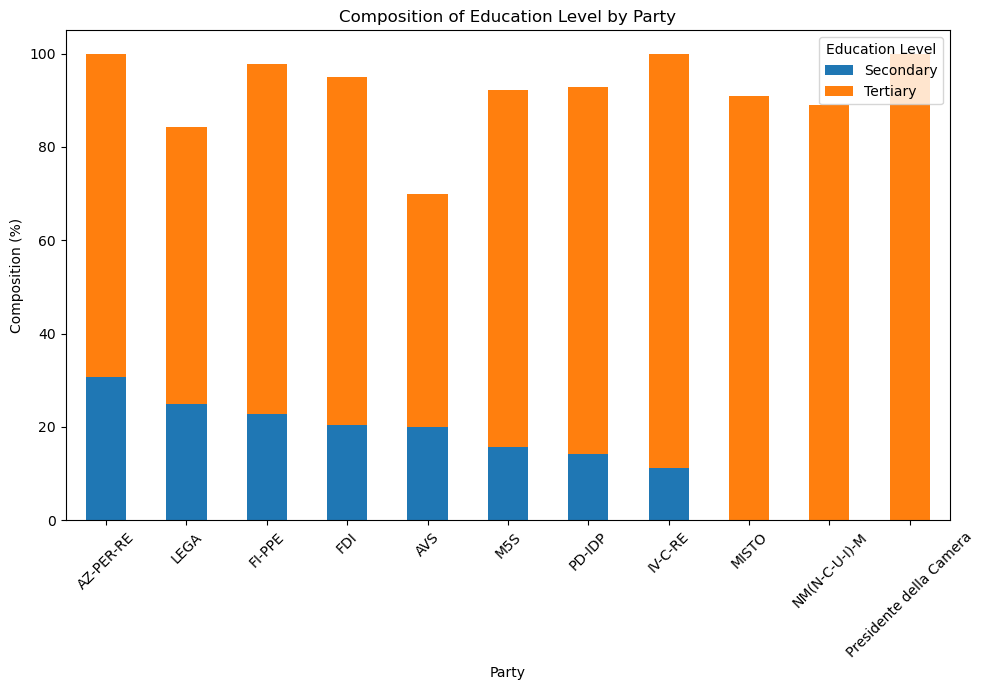

In [49]:
import matplotlib.pyplot as plt
# Pivoting the data for plotting
df_plot = df_plot.pivot_table(values='composition', index='party', columns='education_level', fill_value=0)

# Sorting the pivot table by 'Secondary' column in descending order
df_plot = df_plot.sort_values(by='Secondary', ascending=False)

# Plotting the stacked bar chart
df_plot.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Composition of Education Level by Party')
plt.xlabel('Party')
plt.ylabel('Composition (%)')
plt.legend(title='Education Level')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

# To summarize

We webscraped the website of the camera dei diputati

- We used a `semi-api` - URLs were organized in an API way, but we still had to go online.
- We used `BeautifulSoup` to navigate the `HTML` code and find our data.
- We then analyzed the data.

For us, this website was almost ideal: everything was very nicely formatted. But sometimes, things can be even better:

- The API allows us to interact directly with the database.

Or they can be absolutely worse:

- The API is non-systematic and works through `Javascript`

## Let's properly define what an API is

What's an `API`, and how do we use it?

- An application programming interface (API) is a way for two or more computer programs or components to communicate with each other.

You should think of your computer as one of those computer programs, and an external database as another. The API is the interface through which you can make your requests.

You use it in the same way as we did so far, with `requests`, but you must understand how it works, each API works differently.

### Detecting and using APIs

Sometimes website gives you the API:

- twitter used to do it for researchers, sadly this is over
- facebook provides an API that's not too expensive
- Google's artificial intelligence uses an API

For webscraping, we will use an API when the website we scrape use one.

For each website you investigate, ask yourself the following questions:

- Where is the information on the webpage coming from?
    - Was it hardcoded on the webpage? -- Classic webscraping with requests as we did
    - Is it getting information that's free and hosted online? -- API
    - Is it getting information that's not free to access and hosted online?
        - Can we make it accessible - or `lighthack` it? -- API with cookies
        - We cannot? -- Selenium
        
We're going to look at examples of each of these categories. 

- Examples are going to feel a bit more random now, they come from my own experience.

## Is it getting information that's free and hosted online?
### The classic API case

Let's try to webscrape the website of state aid of the Spanish state:

https://www.infosubvenciones.es/bdnstrans/GE/en/concesiones/consulta

**Whenever you push a button on a website, if the information changes but the URL remains fixed: the website probably uses an API**

Let's look at where their database is located.

We found an URL that seems to contain the data we want in an orderly way:

https://www.infosubvenciones.es/bdnstrans/api/concesiones/busqueda?

vpd=GE&page=0&pageSize=100&order=fechaConcesion&direccion=desc

Recognize that the URL is again organized in an orderly fashion

The first part of the URL is the database we will be making requests to:

https://www.infosubvenciones.es/bdnstrans/api/concesiones/busqueda?

The second part are the arguments we will pass to this database when making some requests to it

vpd=GE&page=0&pageSize=100&order=fechaConcesion&direccion=desc

- `vpd`? No clue
- `page` - aids are ordered in page, with a
- `direccion` - defines the order of the page, currently descending

We're almost there, we understood how their website is organized. How is the data itself is organized?

The format of the data is called `JSON`, much like excel `.xls`, text `.csv`, or stata's `.dta`, it's a data format. `JSON` is widely regarded as one of the best data format, and widely used online for small scale dataset.

In [23]:
import requests
res = requests.get('https://www.infosubvenciones.es/bdnstrans/api/concesiones/busqueda?vpd=GE&page=0&pageSize=10&order=fechaConcesion&direccion=desc')
print(res)

<Response [200]>


In [24]:
data = res.json()
print(type(data))

<class 'dict'>


The information in `JSON` is akin to a `dictionary` another python base object we've used in the past but that I haven't explained. To sum up what a `dictionary` is:

1. It's a way to store information
2. It's a hybrid between a `list` and a `pandas.dataframe`
3. It has `fields` instead of columns:
    - fields are access through a key: the name of that field
    - inside a field, there can be any kind of data

Let's open up our json info, the `fields` of a `dictionary`, where the information is contained, can be searched with the command `.keys()`, akin to when we use the common `.columns` on a `pandas.dataframe`

In [26]:
data.keys()

dict_keys(['content', 'pageable', 'last', 'totalPages', 'totalElements', 'first', 'sort', 'numberOfElements', 'size', 'number', 'empty', 'advertencia'])

Looking at the website https://www.infosubvenciones.es/bdnstrans/api/concesiones/busqueda?vpd=GE&page=0&pageSize=100&order=fechaConcesion&direccion=desc, we should open the field "content"

In [29]:
type(data['content'][0])

dict

The first bracket indicates that inside of the data['content'] field, we have a list, and inside the list a dictionary by each type of aid

In [30]:
pd.DataFrame(data['content'])

,id,codConcesion,fechaConcesion,aplicacionPresupuestaria,beneficiario,instrumento,importe,ayudaEquivalente,urlBR,tieneProyecto,numeroConvocatoria,idConvocatoria,convocatoria,descripcionCooficial,nivel1,nivel2,nivel3,codigoInvente,idPersona
0,105680696,105680696,2024-05-08T00:00:00+02:00,None,****4261* HILDEGARD SCHUMANN MARLIES,SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...,37600.00,37600.00,https://www.caib.es/eboibfront/?lang=es,False,662529,864089,PROGRAMA3 Y 4 RD 853/2021,PROGRAMES 3 I 4 RD 853&2021,ILLES BALEARS,DIRECCIÓN GENERAL DE ARQUITECTURA Y VIVIENDA,None,None,18646722
1,105680692,105680692,2024-05-08T00:00:00+02:00,None,B57885014 BLANC DE GRIS CALA DOR SL,SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...,1237.50,1237.50,http://www.caib.es/eboibfront/es/2011/7643/sec...,False,745703,947263,"Resolución del consejero de Economia, Hacienda...","Resolució del conseller d'Economia, Hisenda i ...",ILLES BALEARS,"DIRECCIÓN GENERAL DEL TESORO, POLÍTICA FINANCI...",None,None,7328022
2,105680691,105680691,2024-05-08T00:00:00+02:00,None,B57483265 COMENSALS MENJADORS ESCOLARS SL,SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...,5292.24,5292.24,http://www.caib.es/eboibfront/es/2011/7643/sec...,False,745703,947263,"Resolución del consejero de Economia, Hacienda...","Resolució del conseller d'Economia, Hisenda i ...",ILLES BALEARS,"DIRECCIÓN GENERAL DEL TESORO, POLÍTICA FINANCI...",None,None,11830624
3,105680689,105680689,2024-05-08T00:00:00+02:00,None,B16571507 HOTEL BOUTIQUE BOSCH SL,SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...,4125.00,4125.00,http://www.caib.es/eboibfront/es/2011/7643/sec...,False,745703,947263,"Resolución del consejero de Economia, Hacienda...","Resolució del conseller d'Economia, Hisenda i ...",ILLES BALEARS,"DIRECCIÓN GENERAL DEL TESORO, POLÍTICA FINANCI...",None,None,13682579
4,105680686,105680686,2024-05-08T00:00:00+02:00,None,B07917495 INFO MIRBEN SL,SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...,1862.35,1862.35,http://www.caib.es/eboibfront/es/2011/7643/sec...,False,745703,947263,"Resolución del consejero de Economia, Hacienda...","Resolució del conseller d'Economia, Hisenda i ...",ILLES BALEARS,"DIRECCIÓN GENERAL DEL TESORO, POLÍTICA FINANCI...",None,None,5587408
5,105680685,105680685,2024-05-08T00:00:00+02:00,None,***4931** JAIME CARBONELL ROSSELLO,SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...,2062.50,2062.50,http://www.caib.es/eboibfront/es/2011/7643/sec...,False,745703,947263,"Resolución del consejero de Economia, Hacienda...","Resolució del conseller d'Economia, Hisenda i ...",ILLES BALEARS,"DIRECCIÓN GENERAL DEL TESORO, POLÍTICA FINANCI...",None,None,11694934
6,105680684,105680684,2024-05-08T00:00:00+02:00,None,***2287** CATALINA GALMES RANDALL,SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...,7795.76,7795.76,http://www.caib.es/eboibfront/es/2011/7643/sec...,False,745703,947263,"Resolución del consejero de Economia, Hacienda...","Resolució del conseller d'Economia, Hisenda i ...",ILLES BALEARS,"DIRECCIÓN GENERAL DEL TESORO, POLÍTICA FINANCI...",None,None,12890170
7,105680681,105680681,2024-05-08T00:00:00+02:00,None,B67899468 REYNES SHOP SL,SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...,4125.00,4125.00,http://www.caib.es/eboibfront/es/2011/7643/sec...,False,745703,947263,"Resolución del consejero de Economia, Hacienda...","Resolució del conseller d'Economia, Hisenda i ...",ILLES BALEARS,"DIRECCIÓN GENERAL DEL TESORO, POLÍTICA FINANCI...",None,None,18646717
8,105680680,105680680,2024-05-08T00:00:00+02:00,None,B07215692 GRAVILLERA SON CHIBETLI SL,SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...,20727.41,20727.41,http://www.caib.es/eboibfront/es/2011/7643/sec...,False,745703,947263,"Resolución del consejero de Economia, Hacienda...","Resolució del conseller d'Economia, Hisenda i ...",ILLES BALEARS,"DIRECCIÓN GENERAL DEL TESORO, POLÍTICA FINANCI...",None,None,5585784
9,105680679,105680679,2024-05-08T00:00:00+02:00,None,B72835382 GUIXOS AULA ESTUDI SL,SUBVENCIÓN y ENTREGA DINERARIA SIN

Let's do a loop, in each iteration of the loop we extract the field that are insteresting to us.

We have all the tools to extract this information now!

In [36]:
data['content'][0]['importe']

37600

In [31]:
aid = data['content'][0]
print(aid)

{'id': 105680696, 'codConcesion': '105680696', 'fechaConcesion': '2024-05-08T00:00:00+02:00', 'aplicacionPresupuestaria': None, 'beneficiario': '****4261* HILDEGARD SCHUMANN MARLIES', 'instrumento': 'SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPRESTACIÓN ', 'importe': 37600, 'ayudaEquivalente': 37600, 'urlBR': 'https://www.caib.es/eboibfront/?lang=es', 'tieneProyecto': False, 'numeroConvocatoria': '662529', 'idConvocatoria': 864089, 'convocatoria': 'PROGRAMA3 Y 4 RD 853/2021', 'descripcionCooficial': 'PROGRAMES 3 I 4 RD 853&2021', 'nivel1': 'ILLES BALEARS', 'nivel2': 'DIRECCIÓN GENERAL DE ARQUITECTURA Y VIVIENDA', 'nivel3': None, 'codigoInvente': None, 'idPersona': 18646722}


In [56]:
#### Create a list to store information
information_storage = list()

# Let's loop around each element of the data['content'] list

    # Take all the data here
    case_id = aid['id']
    date_aid = aid['fechaConcesion']
    instrument = aid['instrumento']
    aid_amount = aid['ayudaEquivalente']
    aid_grantor = aid['convocatoria']
    aid_region = aid['nivel1']
    # Store everything
    information_storage.append([case_id, date_aid, instrument, aid_amount, aid_grantor, aid_region])
 

           id                       date  \
0   105643820  2024-05-07T00:00:00+02:00   
1   105643819  2024-05-07T00:00:00+02:00   
2   105643818  2024-05-07T00:00:00+02:00   
3   105643817  2024-05-07T00:00:00+02:00   
4   105643816  2024-05-07T00:00:00+02:00   
..        ...                        ...   
95  105643652  2024-05-07T00:00:00+02:00   
96  105643651  2024-05-07T00:00:00+02:00   
97  105643650  2024-05-07T00:00:00+02:00   
98  105643649  2024-05-07T00:00:00+02:00   
99  105643648  2024-05-07T00:00:00+02:00   

                                           instrument   amount  \
0   SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...  2635.23   
1   SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...  7905.68   
2   SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...   843.77   
3   SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...  2531.29   
4   SUBVENCIÓN y ENTREGA DINERARIA SIN CONTRAPREST...  1170.79   
..                                                ...      ...   
95  SUBVE

Everything works out very well, but we only have a 10 case of aids: far from the total. How do we make the API spit everything out?

We will be changing the arguments to the API, let's try some stuff, it's a trial and error process. What we are interested in is getting all the data, what happens if we increase page size?

`https://www.infosubvenciones.es/bdnstrans/api/concesiones/busqueda?vpd=GE&page=0&pageSize=10000&order=fechaConcesion&direccion=desc`

Here I put it at `10000` the page size. But let's do some test with our browser

We can create a loop to do everything. Apparently the maximum size we can ask in each iteration of the loop is `10000`

Look online, how many aid declarations are there? 22,711,488. We need to perform a loop that does enough iteration so as to take everything.

In [37]:
# Let's import some useful packages to perform these operations
import math
from tqdm import trange
from time import sleep

In [39]:
# How many iterations will we have to do? You need to reach 22711488 by steps of 10000
nbr_iteration = math.ceil(22_711_488/100)
information_storage = list()
for it in trange(nbr_iteration):
    
    # Write the url for this page
    url = f"https://www.infosubvenciones.es/bdnstrans/api/concesiones/busqueda?vpd=GE&page={it}&pageSize=100&order=fechaConcesion&direccion=desc"
    
    # Ask for the json data
    # sleep(10)
    json_response = requests.get(url)

    # Parse it into json
    data = res.json()
    
    # Let's loop around each element of the data['content'] list
    for aid in data['content']:
        # Take all the data here
        case_id = aid['id']
        date_aid = aid['fechaConcesion']
        instrument = aid['instrumento']
        aid_amount = aid['ayudaEquivalente']
        aid_grantor = aid['convocatoria']
        aid_region = aid['nivel1']
        # Store everything
        information_storage.append([case_id, date_aid, instrument, aid_amount, aid_grantor, aid_region])
    

  0%|                                                                          | 5/227115 [01:53<1425:58:08, 22.60s/it]


KeyboardInterrupt: 

We will use that loop again, let's build a function, as usual. Here everything is nicely organized so it's better

In [41]:
def extract_json(information_storage, data):
    # Let's loop around each element of the data['content'] list
    for aid in data['content']:
        # Take all the data here
        case_id = aid['id']
        date_aid = aid['fechaConcesion']
        instrument = aid['instrumento']
        aid_amount = aid['ayudaEquivalente']
        aid_grantor = aid['convocatoria']
        aid_region = aid['nivel1']
        # Store everything
        information_storage.append([case_id, date_aid, instrument, aid_amount, aid_grantor, aid_region])
    return(information_storage)

Rewrite the loop in a more elegant way

In [ ]:
information_storage = list()
for it in trange(nbr_iteration):
    
    # Write the url for this page
    url = f"https://www.infosubvenciones.es/bdnstrans/api/concesiones/busqueda?vpd=GE&page={it}&pageSize=100&order=fechaConcesion&direccion=desc"
    
    # Ask for the json data
    sleep(10)
    json_response = requests.get(url)

    # Parse it into json
    data = res.json()
    
    extract_json(information_storage, data)

The code would take a very long time, you probably want to let your computer run the whole night:

- But if there's an error while you were sleeping, your code `loses` a whole night of code.
- In some instances, errors can occur and be very common.

There is one technique to deal with this issue, and one remedy:

1. Have your code directly being able to handle errors - when a website is not responding.
2. Build your code such that when it runs, it starts from where it stopped last time.

### Ignoring Errors

In many ways errors are like pain. You're feeling pain for a good reason, and most of the time you want to feel pain, your body tells you you're doing something wrong. Sometimes though, it's better not to feel it and power through - you take a painkiller.

In python the painkiller is called a `try:` statement

In [47]:
import random
nbr = random.randint(0, 1)
try:
    print(100/nbr)
except:
    print("there would've been an error")

print(100+50)

there would've been an error
150


When we make `requests` in a loop, we sometimes want to put it inside a `try` and `except` statement.

We try to get the data for this webpage, if it does not work, we move on to the next webpage.

In [83]:
information_storage = list()
for it in trange(nbr_iteration):
    
    # Write the url for this page
    url = f"https://www.infosubvenciones.es/bdnstrans/api/concesiones/busqueda?vpd=GE&page={it}&pageSize=100&order=fechaConcesion&direccion=desc"
    
    # Ask for the json data
    sleep(10)
    try:
        json_response = requests.get(url)
    except:
        continue

    # Parse it into json
    data = res.json()
    
    extract_json(information_storage, data)

  0%|                                                                                         | 0/2272 [00:00<?, ?it/s]


NameError: name 'sleep' is not defined

Most of the time what happens is the site is overburden and you need to wait a bit.

In [ ]:
information_storage = list()
for it in trange(nbr_iteration):
    
    # Write the url for this page
    url = f"https://www.infosubvenciones.es/bdnstrans/api/concesiones/busqueda?vpd=GE&page={it}&pageSize=100&order=fechaConcesion&direccion=desc"
    
    # Ask for the json data
    sleep(10)
    success = False
    while not success:
        try:
            json_response = requests.get(url)
            success = True
        except:
            sleep(60)

    # Parse it into json
    data = res.json()
    
    extract_json(information_storage, data)

This is the most efficient way I've found! Your code will continue running until it downloads everything, and nothing will stop him. The only problem, is that you cannot stop your code anymore:

- If you interrupt your code while it's inside the `try` statement, the error will be captured by it and it won't stop.

You want your code to treat different errors differently

In [133]:
information_storage = list()
for it in trange(nbr_iteration):
    
    # Write the url for this page
    url = f"https://www.infosubvenciones.es/bdnstrans/api/concesiones/busqueda?vpd=GE&page={it}&pageSize=10&order=fechaConcesion&direccion=desc"
    
    # Ask for the json data
    success = False
    while not success:
        try:
            json_response = requests.get(url)
            success = True
        except KeyboardInterrupt:
            print("Program stopped by user.")
            raise  # re-raise the KeyboardInterrupt to actually stop the program
        except Exception as e:
            print(f"An error occurred: {e}")
            continue

    # Parse it into json
    data = res.json()
    
    extract_json(information_storage, data)

  0%|▏                                                                              | 5/2272 [00:41<5:14:45,  8.33s/it]

Program stopped by user.


KeyboardInterrupt: 

## Build intelligent codes

We've build a code that powers through until it reaches the end. Problem is, sometimes you'll want to stop your computer and resume your work in the future.

You want to build code that understands you've already collected some data, and to collect the next.

1. You specify a path to a file that is the dataset you're building.
2. Python search for the file.
    - Option 1: The file exists, it computes how much data was collected, starts from there
    - Option 2: The file does not exist, it starts from scratch
3. If you interrupt your code mid-way, before closing, it saves the data collected

To implement this methodology let's put our data collection loop into a function

In [48]:
def data_collection(start_iteration):
    # Make up an informaiton list
    information_storage = list()
    try:
        for it in trange(start_iteration, nbr_iteration):

            # Write the url for this page
            url = f"https://www.infosubvenciones.es/bdnstrans/api/concesiones/busqueda?vpd=GE&page={it}&pageSize=10&order=fechaConcesion&direccion=desc"

            # Ask for the json data
            success = False
            while not success:
                try:
                    json_response = requests.get(url)
                    success = True
                except KeyboardInterrupt:
                    print("Stopped the program, saving the data first")
                    return(information_storage)
                except Exception as e:
                    print(f"An error occurred: {e}")
                    continue

            # Parse it into json
            data = res.json()

            information_storage = extract_json(information_storage, data)
    except KeyboardInterrupt:
        print("Stopped the program, saving the data first")
        return(information_storage)
        
    return(information_storage)

Now implement the code such that it scans for the existence of a dataset already and how to append it

In [53]:
import os

# Here is the path to the database
path_to_database = 'C:/Users/anato/Documents/travail/courses/python-for-economist/class6/spanish_data.csv'
nbr_iteration = math.ceil(22747086/10)
# Check if the database already exists
if os.path.exists(path_to_database):
    # The database exists, import it and compute the number of observation it already contains
    database = pd.read_csv(path_to_database)
    start_iteration = int(database.shape[0]/10)
else:
    # The database does not exist, make up an empty one and start the iterations at 0
    database = pd.DataFrame()
    start_iteration = 0
    
# Now launch the code
information = data_collection(start_iteration)

# Register the new information
dataset_new = pd.DataFrame(information, columns = ['id', 'date', 'aid_type', 'aid_amount', 'aid_contest', 'region'])

# Append the new information to the old
database = pd.concat([database, dataset_new], axis = 0)

# Now you save it
database.to_csv(path_to_database, index = False)

  0%|                                                                         | 5/2274706 [00:57<7206:22:34, 11.40s/it]

Stopped the program, saving the data first


For this website:

- The API was freely accessible (even if not so great).
- We implemented a code designed to fetch all the information.

Because the code would take a massive amount of time we:

- Implemented error procedures in case something goes wrong.
- Created a code that starts from where it stops, anticipating that we'll run it many times

## Another example of an API

We've done one, let's keep training on another, which this time is going to be slightly different.

Let's try to webscrape information. On the website of the register how who presented for the elections.

https://dait.interno.gov.it/elezioni/trasparenza/elezioni-politiche-2022

How do we scrape this kind of website?

**Whenever you push a button on a website, if the information changes but the URL remains fixed: the website probably uses an API**

Let's use the API to get all the judiciary accounts of candidates to the parliamentary chamber:

- Using an API is no different than using requests, it's just that the information comes in a perfect way

In [6]:
import requests
# write the URL to the json database
url = "https://dait.interno.gov.it/documenti/trasparenza/POLITICHE_20220925/CAMERA_ITALIA_20220925/CAMERA_ITALIA_20220925_pluri.json?_=630966"
json_database = requests.get(url)
print(json_database.content)

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\n<HTML><HEAD><META HTTP-EQUIV="Content-Type" CONTENT="text/html; charset=iso-8859-1">\n<TITLE>ERROR: The request could not be satisfied</TITLE>\n</HEAD><BODY>\n<H1>403 ERROR</H1>\n<H2>The request could not be satisfied.</H2>\n<HR noshade size="1px">\nRequest blocked.\nWe can\'t connect to the server for this app or website at this time. There might be too much traffic or a configuration error. Try again later, or contact the app or website owner.\n<BR clear="all">\nIf you provide content to customers through CloudFront, you can find steps to troubleshoot and help prevent this error by reviewing the CloudFront documentation.\n<BR clear="all">\n<HR noshade size="1px">\n<PRE>\nGenerated by cloudfront (CloudFront)\nRequest ID: iORg8_SQwr-ELvbWfzgU4G5PPu3VWfwvt7U552pV7kmdPy8kHa1xzw==\n</PRE>\n<ADDRESS>\n</ADDRESS>\n</BODY></HTML>'


Response starting with a 4 means that there's an error. Let's have a look at it

In [7]:
json_database.content

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\n<HTML><HEAD><META HTTP-EQUIV="Content-Type" CONTENT="text/html; charset=iso-8859-1">\n<TITLE>ERROR: The request could not be satisfied</TITLE>\n</HEAD><BODY>\n<H1>403 ERROR</H1>\n<H2>The request could not be satisfied.</H2>\n<HR noshade size="1px">\nRequest blocked.\nWe can\'t connect to the server for this app or website at this time. There might be too much traffic or a configuration error. Try again later, or contact the app or website owner.\n<BR clear="all">\nIf you provide content to customers through CloudFront, you can find steps to troubleshoot and help prevent this error by reviewing the CloudFront documentation.\n<BR clear="all">\n<HR noshade size="1px">\n<PRE>\nGenerated by cloudfront (CloudFront)\nRequest ID: iORg8_SQwr-ELvbWfzgU4G5PPu3VWfwvt7U552pV7kmdPy8kHa1xzw==\n</PRE>\n<ADDRESS>\n</ADDRESS>\n</BODY></HTML>'

In general, if you get that error more than once, it means that you do not have the authorization to enter the website.

- In the instances where you can access it with your browser but not python, you can probably do something about it.

    - When you connect on a webpage, you make a `requests` to a website.
    - Whenever you `requests` data online, you have to introduce yourself: this is what `headers` and among `headers` in particular `cookies` are for.
    - The base cookies python use and your browser use are different

So you juste have to pretend to be someone that you're not. How do we do that?

We get the cookies of the request from online. The way to get to the cookies is convoluted

1. right-click on any webpage then select `inspect`
2. On the menu that opened you'll find a category that's called `network`
3. Click on `network` and refresh the page
4. You'll see all the external `requests` "made by the webpage" to external sources. Locate the requests of a json type (in general)
5. There you can go to `headers` and copy paste whatever is there

Organizing the headers is tedious, it must be organized in a dictionary.

In [8]:
raw_headers = """
Host: dait.interno.gov.it
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:125.0) Gecko/20100101 Firefox/125.0
Accept: application/json, text/javascript, */*; q=0.01
Accept-Language: fr,fr-FR;q=0.8,en-US;q=0.5,en;q=0.3
Accept-Encoding: gzip, deflate, br
Content-Type: application/json
X-Requested-With: XMLHttpRequest
Connection: keep-alive
Referer: https://dait.interno.gov.it/elezioni/trasparenza/elezioni-politiche-2022
Cookie: cookie-agreed-version=1.0.0; _ga_78EEYDJ064=GS1.1.1715148396.2.1.1715149155.0.0.0; _ga=GA1.3.1789629481.1715097354; _gid=GA1.3.362426513.1715097354; cookie-agreed=2; cookie-agreed-categories=%5B%22mandatory%22%2C%22misurazione_cookie_di_tracciamento_%22%5D; SSESS908d44425a37cd2efb28fa8e34cd7e07=FTdZLnFiR6otToy3fHrpCtOfXYVyXR2k1v35AS0vHjA; BIGipServerpool-dait=3793644810.48129.0000; _gat_gtag_UA_39126249_2=1
Sec-Fetch-Dest: empty
Sec-Fetch-Mode: cors
Sec-Fetch-Site: same-origin
TE: trailers
""".strip()
split_lines = [h.split(": ", 1) for h in raw_headers.splitlines()]
headers = dict(split_lines)

In [9]:
print(headers)

{'Host': 'dait.interno.gov.it', 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:125.0) Gecko/20100101 Firefox/125.0', 'Accept': 'application/json, text/javascript, */*; q=0.01', 'Accept-Language': 'fr,fr-FR;q=0.8,en-US;q=0.5,en;q=0.3', 'Accept-Encoding': 'gzip, deflate, br', 'Content-Type': 'application/json', 'X-Requested-With': 'XMLHttpRequest', 'Connection': 'keep-alive', 'Referer': 'https://dait.interno.gov.it/elezioni/trasparenza/elezioni-politiche-2022', 'Cookie': 'cookie-agreed-version=1.0.0; _ga_78EEYDJ064=GS1.1.1715148396.2.1.1715149155.0.0.0; _ga=GA1.3.1789629481.1715097354; _gid=GA1.3.362426513.1715097354; cookie-agreed=2; cookie-agreed-categories=%5B%22mandatory%22%2C%22misurazione_cookie_di_tracciamento_%22%5D; SSESS908d44425a37cd2efb28fa8e34cd7e07=FTdZLnFiR6otToy3fHrpCtOfXYVyXR2k1v35AS0vHjA; BIGipServerpool-dait=3793644810.48129.0000; _gat_gtag_UA_39126249_2=1', 'Sec-Fetch-Dest': 'empty', 'Sec-Fetch-Mode': 'cors', 'Sec-Fetch-Site': 'same-origin', 'TE': 'traile

In [10]:
# Get inside of it now, pretending we are our browser and not a scraper.
res = requests.get(url, headers=headers)
print(res)

<Response [200]>


200, it means we succeeded in taking the data, we are in!

Let's have a look at it

In [11]:
data = res.json()
print(data)

{'metadata': {'elez': 'Camera Italia', 'tp_elez': 2, 'dt_elez': '25/09/2022', 'dt_rep': '24/09/2022 14:23:23', 'dir': 'CAMERA_ITALIA_20220925', 'nota': None}, 'candidati': [{'n_ord': 74, 'l_fasc': '0 ', 'cod_ente_p': 'CI01', 'desc_ente_p': 'PIEMONTE 1', 'cod_ente': 'CP011', 'desc_ente': 'PIEMONTE 1 - P01', 'num_lista': 1, 'cod_lista': 415691, 'desc_lista': 'MOVIMENTO 5 STELLE', 'num_c': 1, 'cod_cand': 1347202, 'nome_c': 'CHIARA', 'cogn_c': 'APPENDINO', 'altro_1': None, 'altro_2': None, 'dt_nasc': '12/06/1984', 'l_nasc': 'MONCALIERI (TO)', 'cod_fisc': 'PPNCHR84H52F335W', 'e_file': [{'tp_doc': 'CV', 'f_doc': '9852_415691_1347202_chiara_appendino_25092022_cv.pdf'}, {'tp_doc': 'CP', 'f_doc': '9853_415691_1347202_chiara_appendino_25092022_cp.pdf'}]}, {'n_ord': 74, 'l_fasc': '0 ', 'cod_ente_p': 'CI01', 'desc_ente_p': 'PIEMONTE 1', 'cod_ente': 'CP011', 'desc_ente': 'PIEMONTE 1 - P01', 'num_lista': 1, 'cod_lista': 415691, 'desc_lista': 'MOVIMENTO 5 STELLE', 'num_c': 2, 'cod_cand': 1347203, 'no

Whenever you have an API like that, that's great, your work is almost already done because the information is already given to you in such a structured way.

Study the website from your browser to understand what fields of the `json` data you want to study. In truth

In [12]:
import pandas as pd
# Create a list to store information
dataset = pd.DataFrame(data['candidati'])
print(dataset.sample(n=3))

      n_ord l_fasc cod_ente_p  desc_ente_p cod_ente          desc_ente  \
1737     16     0        CI16      LAZIO 2    CP162      LAZIO 2 - P02   
514      83     0        CI05  LOMBARDIA 3    CP051  LOMBARDIA 3 - P01   
1653     48     0        CI15      LAZIO 1    CP153      LAZIO 1 - P03   

      num_lista  cod_lista                                 desc_lista  num_c  \
1737          7     415503                      ITALEXIT PER L'ITALIA      4   
514          15     421570           UNIONE POPOLARE CON DE MAGISTRIS      3   
1653         13     417598  NOI MODERATI/LUPI - TOTI - BRUGNARO - UDC      3   

      cod_cand   nome_c      cogn_c altro_1 altro_2     dt_nasc   l_nasc  \
1737   1348181   SIMONA     BOCCUTI    None    None  25/09/1974     ROMA   
514    1355429    MARCO      SIRONI    None    None  10/06/1962  BERGAMO   
1653   1350211  EUGENIO  DE ZULIANI    None    None  18/11/1961     ROMA   

              cod_fisc                                             e_file  
1

Only one information is not properly parsed in this dataframe information about where the CVs and Fiscal declarations are located. Let's get to that information.

In [30]:
new_cols = pd.json_normalize(dataset['e_file'])
dataset['CV'] = new_cols[0].apply(lambda x: x.get('f_doc'))
dataset['CP'] = new_cols[1].apply(lambda x: x.get('f_doc') if isinstance(x, dict) else '')

Our dataset is almost ready, let's look now at how to reconstruct the links for the CVs and CPs. I copied here a random link:

https://dait.interno.gov.it/documenti/trasparenza/POLITICHE_20220925/CAMERA_ITALIA_20220925/candidati/CI17/CP171/419255/1353008/6525_419255_1353008_luciano_d_alfonso_25092022_cv.pdf

It goes candidati/ then code of the circonscription/ then code of the circonscription more precise/ then list code / then candidate code / then name of the file

In [33]:
### find the code of that mp
t = np.where(dataset['cogn_c'] == "D'ALFONSO")[0][0]
print(dataset.loc[t ,:])

n_ord                                                         75
l_fasc                                                        0 
cod_ente_p                                                  CI17
desc_ente_p                                              ABRUZZO
cod_ente                                                   CP171
desc_ente                                          ABRUZZO - P01
num_lista                                                      1
cod_lista                                                 419255
desc_lista     PARTITO DEMOCRATICO - ITALIA DEMOCRATICA E PRO...
num_c                                                          1
cod_cand                                                 1353008
nome_c                                                   LUCIANO
cogn_c                                                 D'ALFONSO
altro_1                                                     None
altro_2                                                     None
dt_nasc                  

Let's write this complicated formula. Let's do a loop for easier comprehension

In [34]:
base_url = "https://dait.interno.gov.it/documenti/trasparenza/POLITICHE_20220925/CAMERA_ITALIA_20220925/candidati"
# Loop over all rows
new_cols = list()
for ind, row in dataset.iterrows():
    
    # Unpack all the values from there
    ente_p = row['cod_ente_p']
    ente = row['cod_ente']
    cod_list = row['cod_lista']
    cod_cand = row['cod_cand']
    cv = row['CV']
    cp = row['CP']
    
    # get the CV link
    cv = f"{base_url}/{ente_p}/{ente}/{cod_list}/{cod_cand}/{cv}"
    cp = f"{base_url}/{ente_p}/{ente}/{cod_list}/{cod_cand}/{cp}"
    new_cols.append([cv, cp])

new_cols = pd.DataFrame(new_cols, columns = ['CV_link', 'CP_link'])
full_dataset = pd.concat([dataset, new_cols], axis = 1).reset_index(drop = True)

We can now proceed with the downloading of CVs and CPs.

In [35]:
from tqdm import trange
import urllib.request
path_to_output = 'C:/Users/anato/Documents/travail/courses/python-for-economist/class6/pdfs'

for idx in trange(len(full_dataset)):
    
    # Get the link to CV
    cod_cand = full_dataset.loc[idx, 'cod_cand']
    link_to_cv = full_dataset.loc[idx, 'CV_link']
    link_to_cp = full_dataset.loc[idx, 'CP_link']

    
    response = requests.get(link_to_cv, headers=headers)
    with open(f'{path_to_output}/CV_{cod_cand}.pdf', 'wb') as f:
        f.write(response.content)
        
    response = requests.get(link_to_cp, headers=headers)
    with open(f'{path_to_output}/CP_{cod_cand}.pdf', 'wb') as f:
        f.write(response.content)

  1%|▋                                                                               | 25/2788 [00:25<46:14,  1.00s/it]


KeyboardInterrupt: 

We've done:

- Base webscrape - Italian MPs' curricula from the camera's website
- Open API website - Spanish state aid registry
- Closed API website - Italian candidates website

What about website where the API is not-accessible at all?

Let's dive in the worst and final category of web scraping - when an API is not available, and you cannot use request because there's too much javascript.

- Corresponds to most cases where there's a financial application
    - Airbnb/Booking
    - Yelp/google reviews
    - Amazon/Online stores

They're not going to let you in their internal database that easily, so no API is possible there.

For these website, you need a much stronger tool than the ones we use. It's called `Selenium`, it can do everything, but it's very slow, and it bugs a lot.

- It's like the webscraper's nuclear weapon, and you should try never to use it.

To test its use, we'll use a very 25th of April themed website: http://dati.acs.beniculturali.it/CPC/

I am sure this website uses an API, but I never found where.

Why can't we use `requests`? 

**Whenever you push a button on a website, if the information changes but the URL remains fixed: the website probably uses an API if there's no API it uses a lot of javascript**

But let's try anyway to see what happens.

In [1]:
import requests
from bs4 import BeautifulSoup

page_response = requests.get('http://dati.acs.beniculturali.it/CPC/')
page_content = BeautifulSoup(page_response.content, 'html.parser')

print(page_content)

<!DOCTYPE html>

<html xmlns:y="http://xmlns.3dendless.com/y">
<head>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Casellario Politico Centrale - Archivio Centrale dello Stato</title>
<meta content="it" http-equiv="content-language"/>
<meta content="Ministero per i beni e le attività culturali" name="Generator"/>
<meta content="Casellario Politico Centrale" name="keywords"/>
<link href="http://purl.org/dc/elements/1.1/" rel="schema.DC"/>
<meta content="Casellario Politico Centrale" name="DC.Title"/>
<meta content="maas" name="DC.Creator"/>
<meta content="Casellario Politico Centrale" name="DC.Subject"/>
<meta content="Casellario Politico Centrale" name="DC.Description"/>
<meta content="Archivio Centrale dello Stato" name="DC.Publisher"/>
<meta content="maas" name="DC.Contributor"/>
<meta content="(SCHEME=ISO8601) 16/12/2010" name="DC.Date"/>
<meta content="" name="DC.Type"/>
<meta content="(SCHEME=IMT

In the request, the data we are interested in is nowhere to be found.

As it is specified in the website itself, it uses javascript. So here, we take out the nuclear weapon.

In [14]:
!pip install selenium -U

  Using cached selenium-4.20.0-py3-none-any.whl.metadata (6.9 kB)
Using cached selenium-4.20.0-py3-none-any.whl (9.5 MB)
  Attempting uninstall: selenium
    Found existing installation: selenium 3.141.0
    Uninstalling selenium-3.141.0:
      Successfully uninstalled selenium-3.141.0


In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By

driver = webdriver.Chrome()

In [5]:
from selenium.webdriver.common.by import By

With selenium, we're opening up a webpage from a browser as if we were the one navigating, importantly, this browser can trigger javascript codes

In [4]:
# Let's open the webpage
driver.get('http://dati.acs.beniculturali.it/CPC/')
driver.maximize_window()

In spite of being not the best way to do scraping, it might be the most intuitive because it's very close to what you would be doing if you were not programming. For example, let's have the code press the cookies button

In [7]:
# Click on the button for cookies (find_element(By.XPATH"//tag[contains(text(), '')]")) - orient with text

Now let's locate on the space with Tabella

In [11]:
# Click on the button for tabella (find_element(By.XPATH, "//tag[contains(text(), '')]")) - orient with text

Now get the table that's in there

In [50]:
!pip install lxml
!pip install html5lib

   ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
   --- ------------------------------------ 10.2/112.2 kB ? eta -:--:--
   ------------------------ -------------- 71.7/112.2 kB 787.7 kB/s eta 0:00:01
   -------------------------------------- 112.2/112.2 kB 935.2 kB/s eta 0:00:00


In [54]:
import pandas as pd
table = driver.find_element(By.XPATH, '//div[@id="z-table"]//table[@class="zTable"]')
df = pd.read_html(table.get_attribute('outerHTML'))

C:\Users\anato\AppData\Local\Temp\ipykernel_6056\3980027.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table.get_attribute('outerHTML'))


And then we would move on to the next page

In [60]:
# Get the first li
ii = 3
driver.find_element(By.XPATH, f'//li[@class="navButton navArrow"]//a[@title="pagina {ii}"]').click()

We know how to do it all, let's build a function that does it now. That's the exercise for this end of class